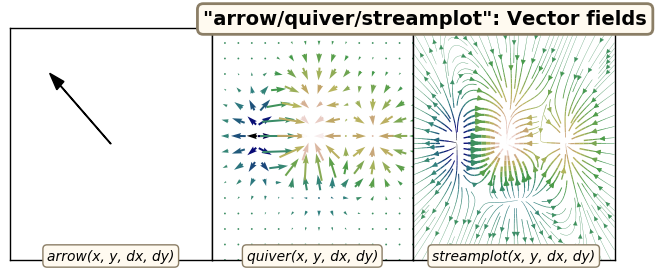

In [12]:
import matplotlib.pyplot as plt
import numpy as np

import example_utils

# Generate data
n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
xi, yi = np.meshgrid(x, y)

z = (1 - xi / 2 + xi**5 + yi**3) * np.exp(-xi**2 - yi**2)
dy, dx = np.gradient(z)
mag = np.hypot(dx, dy)

fig, axes = example_utils.setup_axes()

# Use ax.arrow to plot a single arrow on the axes.
axes[0].arrow(0, 0, -0.5, 0.5, width=0.005, color='black')
axes[0].axis([-1, 1, -1, 1])
example_utils.label(axes[0], 'arrow(x, y, dx, dy)')

# Plot a regularly-sampled vector field with ax.quiver
ds = np.s_[::16, ::16] # Downsample our array a bit...
axes[1].quiver(xi[ds], yi[ds], dx[ds], dy[ds], z[ds], cmap='gist_earth',
               width=0.01, scale=0.25, pivot='middle')
axes[1].axis('tight')
example_utils.label(axes[1], 'quiver(x, y, dx, dy)')

# Use ax.streamplot to show flowlines through our vector field
# We'll get fancy and vary their width and color
lw = 2 * (mag - mag.min()) / mag.ptp() + 0.2
axes[2].streamplot(xi, yi, dx, dy, color=z, density=1.5, linewidth=lw,
                   cmap='gist_earth')
example_utils.label(axes[2], 'streamplot(x, y, dx, dy)')

example_utils.title(fig, '"arrow/quiver/streamplot": Vector fields', y=0.96)
fig.savefig('vector_example.png', facecolor='none')

plt.show()

